# Cancer Dataset Analysis using Linear regression

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import model_selection

In [2]:
#Reading the dataset as dataframe df
df=pd.read_csv('C:\\Users\\user\\Desktop\\CW1 fomative 4050\\cancer_reg.csv', encoding = "ISO-8859-1", engine='python')
#Displaying the top 5 rows of the csv file
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [3]:
#The columns
df.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'Geography',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

In [4]:
X=df[['avgAnnCount', 'avgDeathsPerYear','incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'Geography',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']]


X denotes the feature data.

In [5]:
y=df[['TARGET_deathRate']]

y denotes our label.

In [6]:
#The dimensionality of the feature data 
X.shape

(3047, 33)

The feature data contains 3047 rows and 33 columns.

In [7]:
#Concise summary of the feature data.
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   incidenceRate            3047 non-null   float64
 3   medIncome                3047 non-null   int64  
 4   popEst2015               3047 non-null   int64  
 5   povertyPercent           3047 non-null   float64
 6   studyPerCap              3047 non-null   float64
 7   binnedInc                3047 non-null   object 
 8   MedianAge                3047 non-null   float64
 9   MedianAgeMale            3047 non-null   float64
 10  MedianAgeFemale          3047 non-null   float64
 11  Geography                3047 non-null   object 
 12  AvgHouseholdSize         3047 non-null   float64
 13  PercentMarried           3047 non-null   float64
 14  PctNoHS18_24            

It shows that two columns has datatype object and all other columns has numeric values (3 columns has integer values and 28 columns has float value. It also gives the memory usage.

In [8]:
#Checking for null values by displaying the sum of null values in each columns.
X.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarri

There are missing values in 3 columns:PctSomeCol18_24, PctEmployed16_Over ,PctPrivateCoverageAlone. Most of the observations in PctSomeCol18_24 is missing and hence that column can be removed.PctPrivateCoverageAlone also contains a lot of missing values and hence are removed.PctUnemployed16_Over contains comparitively lesser missing values and hence the missing values can be replaced with the mean of that column. 

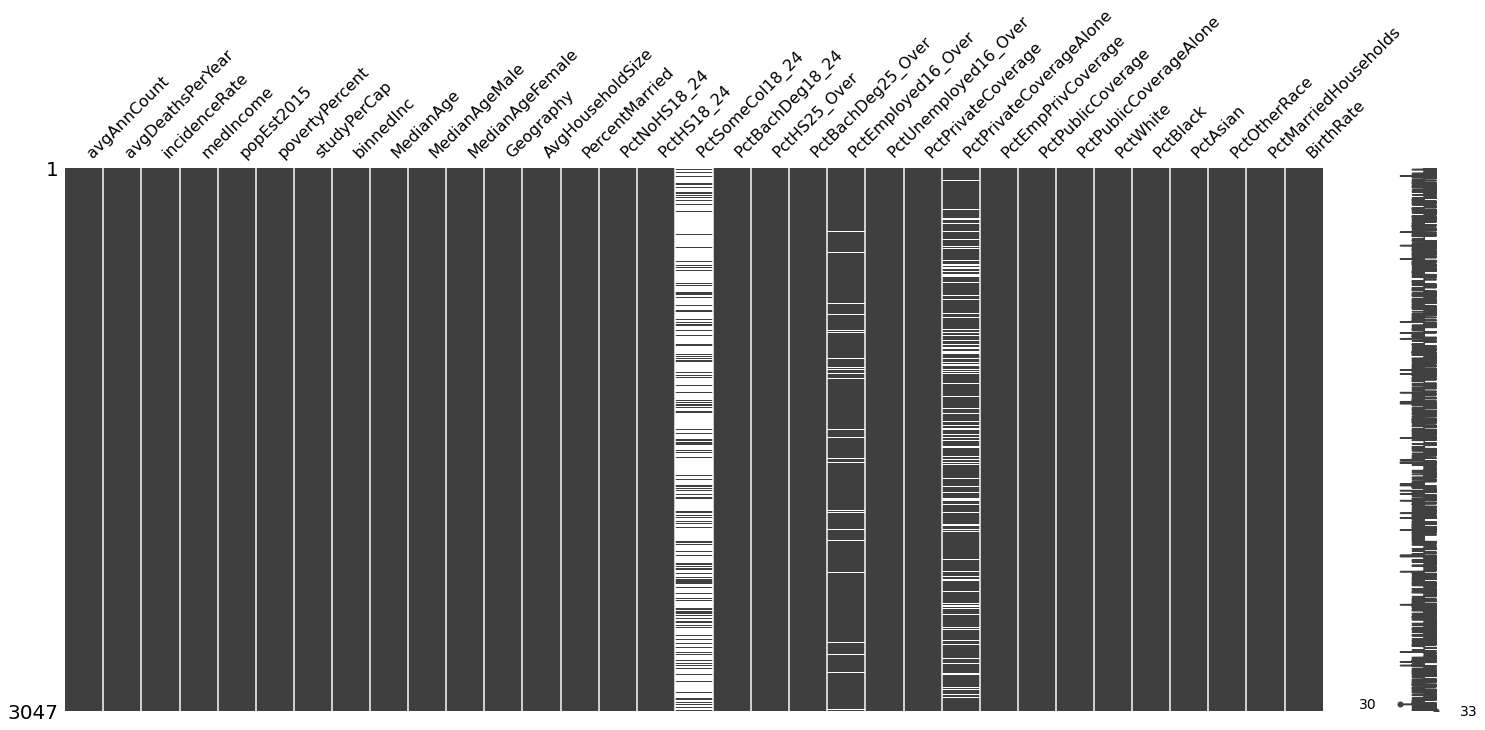

In [9]:
#Importing missingno library for the visualization of missing values.
import missingno as msno
msno.matrix(X)

Missingno provides a small toolset of flexible and easy-to-use missing data visualizations and utilities that allows to get a quick visual summary of the completeness of your dataset.

 All the columns are displayed here and we can see that columns PctSomeCol18_24, PctEmployed16_Over ,PctPrivateCoverageAlone has missing values.

In [10]:
#Finding the median of the column PctEmployed16_Over and filling the missing with that median value 
X['PctEmployed16_Over'].fillna(df['PctEmployed16_Over'].mean(), inplace=True)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


The PctEmployed16_Over column has some missing values and those missing values is replaced with mean of that column.

In [11]:
#Dropping the unwanted columns
cols = ['PctSomeCol18_24','PctPrivateCoverageAlone','binnedInc','Geography']
X = X.drop(cols, axis=1)

The columns PctSomeCol18_24 and PctPrivateCoverageAlone are removed since they contain a lot of missing values. The columns Geography and binnedInc which are not numeric are also dropped.

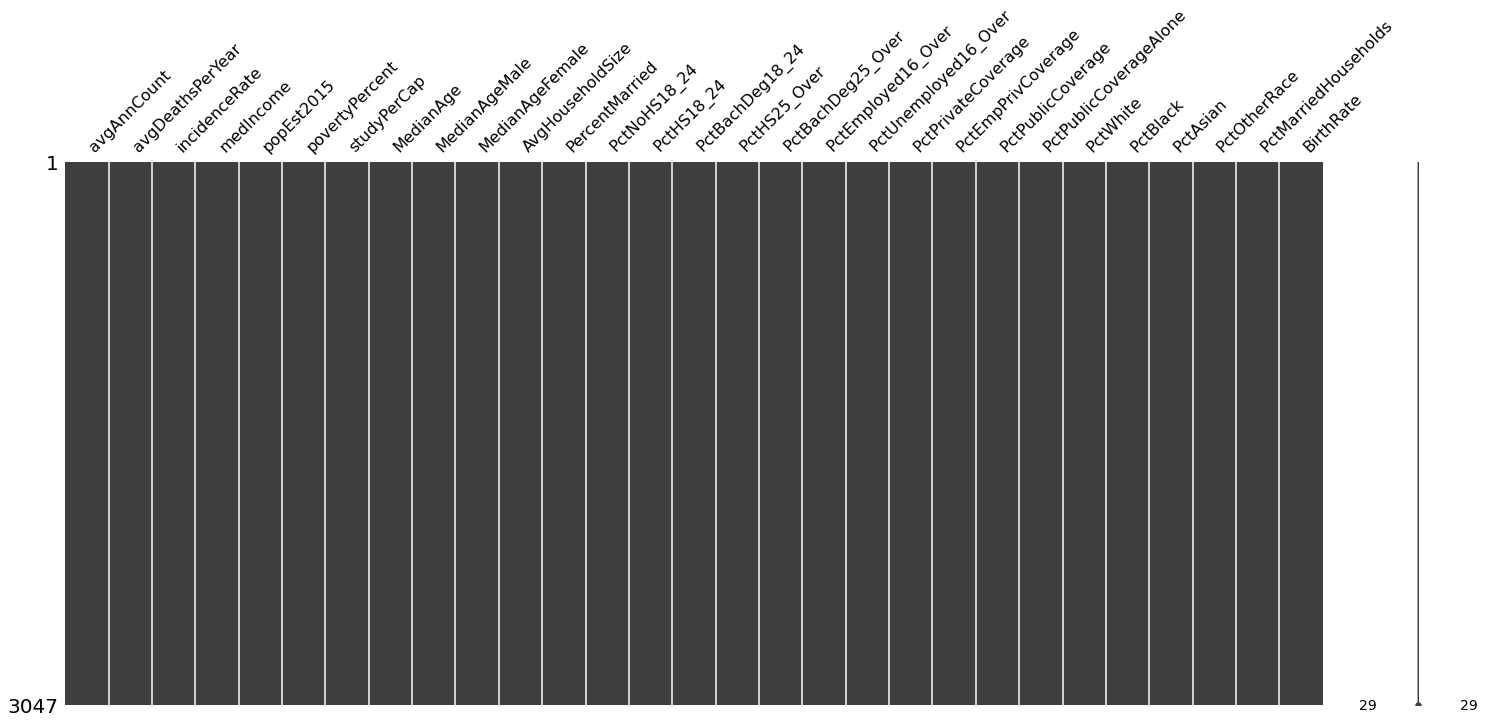

In [12]:
#Again visualizing the presence of missing values in the columns.
msno.matrix(X)

The columns are again visualized and we can see that there are no missing values. 

In [13]:
#To count the number of non-zeros of all rows
np.count_nonzero(df, axis=0)

array([3047, 3047, 3047, 3047, 3047, 3047, 3047, 1116, 3047, 3047, 3047,
       3047, 3047, 3047, 3047, 3045, 3046, 3047, 2929, 3047, 3047, 3047,
       3047, 3047, 3047, 3047, 3047, 3047, 3047, 2975, 2853, 2907, 3047,
       3043], dtype=int64)

The studypercap column contains alot of zero values and hence we replace 0 values with the mean of the studyPerCap column.

In [14]:
mean_studyPerCap = df['studyPerCap'].mean(skipna=True)
print (mean_studyPerCap)


155.399415317608


The mean of studyPerCap is 155.399415317608.

In [15]:
df['studyPerCap']=df.studyPerCap.mask(df.studyPerCap == 0,mean_studyPerCap)
print (df)

      avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
0     1397.000000               469             164.9     489.800000   
1      173.000000                70             161.3     411.600000   
2      102.000000                50             174.7     349.700000   
3      427.000000               202             194.8     430.400000   
4       57.000000                26             144.4     350.100000   
...           ...               ...               ...            ...   
3042  1962.667684                15             149.6     453.549422   
3043  1962.667684                43             150.1     453.549422   
3044  1962.667684                46             153.9     453.549422   
3045  1962.667684                52             175.0     453.549422   
3046  1962.667684                48             213.6     453.549422   

      medIncome  popEst2015  povertyPercent  studyPerCap           binnedInc  \
0         61898      260131            11.2   499.74820

The zero values in studyPerCap column is now replaced with its mean value. and hance dataset is updated.

In [16]:
#Checking the statistical aspects of the dataset
X.describe()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,...,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,42.145323,...,64.354939,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,5.292849,...,10.647057,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,...,22.300000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,39.100000,...,57.200000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,42.400000,...,65.100000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,45.300000,...,72.100000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,65.700000,...,92.300000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


We can observe that our variables are not standardised.
Standardised variables are important to have an interpretable linear regression model.
To get stable beta coefficients, a linear regression model requires no multicolinearity on feature data.
To find the correlaton the function corr can be used.

In [17]:
#Checking the correlation of the different features
X.corr()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
avgAnnCount,1.000000,0.939408,0.073553,0.269145,0.926894,-0.135694,0.082071,-0.024098,-0.124969,-0.122844,...,0.132244,0.202349,-0.173548,-0.093699,-0.136501,0.031376,0.435071,0.209184,-0.106221,-0.034508
avgDeathsPerYear,0.939408,1.000000,0.062690,0.223207,0.977634,-0.066918,0.063488,-0.024599,-0.148487,-0.144069,...,0.056183,0.160124,-0.131687,-0.027338,-0.187159,0.084607,0.443074,0.215149,-0.160266,-0.074420
incidenceRate,0.073553,0.062690,1.000000,-0.001036,0.026912,0.009046,0.077283,0.018089,-0.014733,-0.009106,...,0.105174,0.149825,0.046109,0.040812,-0.014510,0.113489,-0.008123,-0.208748,-0.152176,-0.118181
medIncome,0.269145,0.223207,-0.001036,1.000000,0.235523,-0.788965,0.044003,-0.013288,-0.091663,-0.153278,...,0.724175,0.747294,-0.754822,-0.719756,0.167225,-0.270232,0.425844,0.083635,0.446083,-0.010195
popEst2015,0.926894,0.977634,0.026912,0.235523,1.000000,-0.065299,0.055722,-0.025219,-0.176608,-0.177932,...,0.052677,0.158650,-0.160066,-0.041469,-0.190095,0.073044,0.464168,0.241468,-0.127979,-0.057740
povertyPercent,-0.135694,-0.066918,0.009046,-0.788965,-0.065299,1.000000,-0.055652,-0.029280,-0.214001,-0.148164,...,-0.822534,-0.683100,0.651162,0.798642,-0.509433,0.511530,-0.157289,0.047096,-0.604953,-0.012283
studyPerCap,0.082071,0.063488,0.077283,0.044003,0.055722,-0.055652,1.000000,-0.026030,-0.036647,-0.030577,...,0.092545,0.100063,-0.051497,-0.055512,0.023291,-0.019761,0.062543,-0.015247,-0.051736,0.010676
MedianAge,-0.024098,-0.024599,0.018089,-0.013288,-0.025219,-0.029280,-0.026030,1.000000,0.129119,0.124678,...,0.004665,-0.036926,0.049060,-0.003298,0.035009,-0.017173,-0.038424,-0.030277,0.014504,-0.008276
MedianAgeMale,-0.124969,-0.148487,-0.014733,-0.091663,-0.176608,-0.214001,-0.036647,0.129119,1.000000,0.933696,...,0.082232,-0.208664,0.398967,0.002479,0.398044,-0.242748,-0.238322,-0.266655,0.222278,-0.104105
MedianAgeFemale,-0.122844,-0.144069,-0.009106,-0.153278,-0.177932,-0.148164,-0.030577,0.124678,0.933696,1.000000,...,0.046909,-0.252221,0.455496,0.047659,0.339804,-0.156728,-0.258748,-0.274120,0.161507,-0.098813


To visualise the correlation matrix, we may use the function heatmap seaborn package.


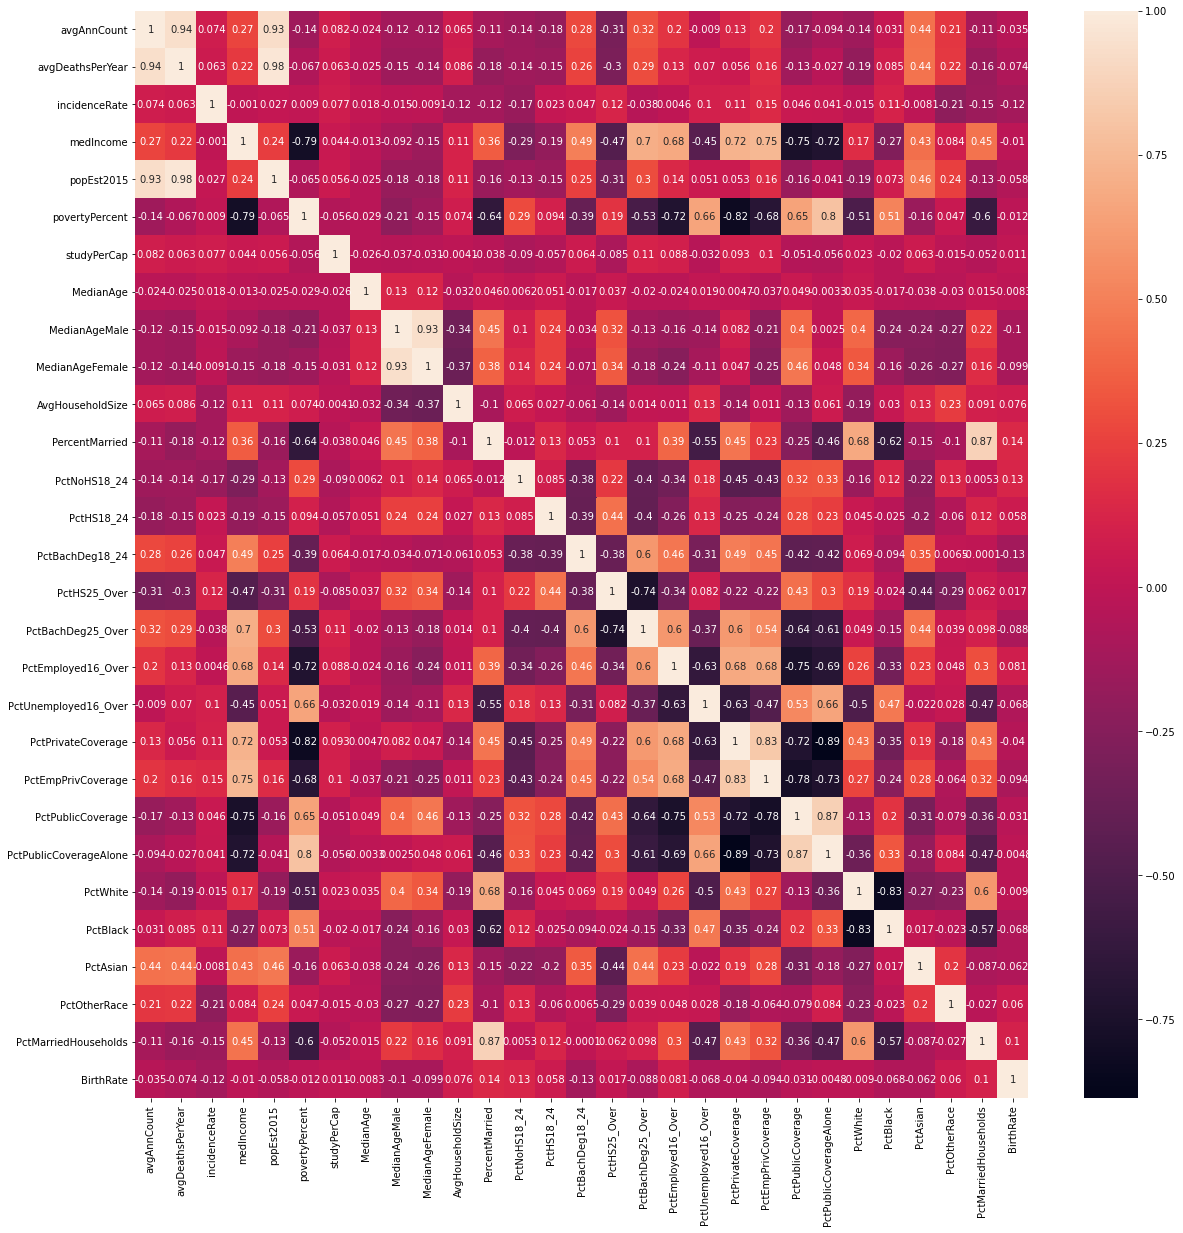

In [18]:
#Displaying the correlation between the columns.
corrmat=X.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(X[top_corr_features].corr(),annot=True)

Looking at the correlation matrix, we can identify the presence of multicollinearity between some of our variables. For example, avgAnnCount has a correlation of 0.94 and 0.93 with avgDeathsPerYear and popEst2015, respectively. This is probably because the three columns essentially contain the same information. Therefore we should only pick one of the three columns when we go into further analysis. Same process can be applied to all other highly correlated columns.An another approach doing so, which is called VIF (Variance Inflation Factor) analysis is shown below.

In [19]:
#Finding the Variance Inflation Factor for the features.
from statsmodels.stats.outliers_influence import variance_inflation_factor
#calculate VIF for each attribute
vif = pd.DataFrame(data = np.array(X.columns), columns=["attribute"])
vif['VIF'] = -1
for i in range(0, X.shape[1]):
    vif.loc[i,'VIF'] = variance_inflation_factor(X.values, i) 
print(vif)
#view VIF for each attribute

                 attribute         VIF
0              avgAnnCount   11.485568
1         avgDeathsPerYear   35.617826
2            incidenceRate   85.425215
3                medIncome  121.163341
4               popEst2015   28.983631
5           povertyPercent   44.683695
6              studyPerCap    1.137543
7                MedianAge    2.047380
8            MedianAgeMale  563.596561
9          MedianAgeFemale  677.108910
10        AvgHouseholdSize   45.830325
11          PercentMarried  600.586265
12            PctNoHS18_24    9.765939
13              PctHS18_24   25.620324
14         PctBachDeg18_24    5.571628
15            PctHS25_Over   93.013503
16       PctBachDeg25_Over   38.310103
17      PctEmployed16_Over  176.915146
18    PctUnemployed16_Over   15.602908
19      PctPrivateCoverage  516.492147
20      PctEmpPrivCoverage  154.091620
21       PctPublicCoverage  564.946257
22  PctPublicCoverageAlone  254.231169
23                PctWhite  181.588413
24                PctBlac

Multicollinearity in regression analysis occurs when two or more independent variables are highly correlated with each other, such that they do not provide unique or independent information in the regression model. If the degree of correlation is high between variables, it can cause problems when fitting and interpreting the regression model.One way to detect multicollinearity is by using a metric known as the variance inflation factor (VIF), which measures the correlation and strength of correlation between the explanatory variables in the regression model.To calculate the VIF for each independent variable in the model, we use the variance_inflation_factor() function from the library.VIF score of an independent variable represents how well the variable is explained by other independent variables.

In [20]:
#Independent variables with VIF greater than 10 are discarded.
vif_noMulticol = vif[vif.VIF<10]
print(vif_noMulticol)

          attribute       VIF
6       studyPerCap  1.137543
7         MedianAge  2.047380
12     PctNoHS18_24  9.765939
14  PctBachDeg18_24  5.571628
24         PctBlack  7.004306
25         PctAsian  2.406212
26     PctOtherRace  1.901392


Only those features which has VIF less than 10 are maintained. Others are discarded.
    VIF starts at 1 and has no upper limit.
    VIF = 1, no correlation between the independent variable and the other variables.
    VIF exceeding 10 indicates high multicollinearity between this independent variable and the others.


In [21]:
#Accessing a group of rows and columns by labels. 
X= X.loc[:, vif_noMulticol.attribute]
X.head()

,studyPerCap,MedianAge,PctNoHS18_24,PctBachDeg18_24,PctBlack,PctAsian,PctOtherRace
0,499.748204,39.3,11.5,6.9,2.594728,4.821857,1.843479
1,23.111234,33.0,6.1,7.5,0.969102,2.246233,3.741352
2,47.560164,45.0,24.0,9.5,0.739673,0.465898,2.747358
3,342.637253,42.8,20.2,2.5,0.782626,1.161359,1.362643
4,0.000000,48.3,14.9,2.0,0.270192,0.665830,0.492135


In [22]:
#Displaying the correlation between the features
X.corr()

,studyPerCap,MedianAge,PctNoHS18_24,PctBachDeg18_24,PctBlack,PctAsian,PctOtherRace
studyPerCap,1.000000,-0.026030,-0.090387,0.063819,-0.019761,0.062543,-0.015247
MedianAge,-0.026030,1.000000,0.006178,-0.016909,-0.017173,-0.038424,-0.030277
PctNoHS18_24,-0.090387,0.006178,1.000000,-0.381422,0.116805,-0.217535,0.126256
PctBachDeg18_24,0.063819,-0.016909,-0.381422,1.000000,-0.093614,0.345883,0.006547
PctBlack,-0.019761,-0.017173,0.116805,-0.093614,1.000000,0.016583,-0.023001
PctAsian,0.062543,-0.038424,-0.217535,0.345883,0.016583,1.000000,0.200781
PctOtherRace,-0.015247,-0.030277,0.126256,0.006547,-0.023001,0.200781,1.000000


We can see that all the features are having very low correlation with others.

We first split data into train-test by using the scikit-learn module train_test_split.

In [23]:
#Splitting the X into X_train and X_test and y into y_train and y_test.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.33, random_state=10, shuffle=True)

In [24]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

scaler.fit(y_train)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

The above block of code standardizes the data keeping test data totally unseen.

In [25]:
#Modeling using Linear regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

The block above trains a liner model on training data. 

In [26]:
#Printing the intercept obtained
print('intercept:', lm.intercept_)

intercept: [8.83427842e-17]


In [27]:
#Printing the coefficients
print('slope:', lm.coef_)


slope: [[-0.01169328 -0.00719055 -0.01903982 -0.26011829  0.23050432 -0.06012947
  -0.17513934]]


In [28]:
#Displaying the features along with their coefficients in sorted in descending order.
coeffs = pd.Series(lm.coef_[0], index=X.columns.values)
coeffs.sort_values(ascending = False)

PctBlack           0.230504
MedianAge         -0.007191
studyPerCap       -0.011693
PctNoHS18_24      -0.019040
PctAsian          -0.060129
PctOtherRace      -0.175139
PctBachDeg18_24   -0.260118
dtype: float64

In [30]:
#To verify whether the residuals of this model are normally distributed.
test = pd.DataFrame({'actual': y_test.squeeze(),
                     'fitted': lm.predict(X_test).squeeze()})
test["residuals"] = test.actual - test.fitted
test.head()


,actual,fitted,residuals
0,-0.070336,-0.547847,0.477511
1,-0.170953,-0.193301,0.022348
2,0.691479,0.103518,0.587961
3,0.421969,0.180864,0.241106
4,-0.034401,-0.073111,0.038709


The block below plots the frequency distribution of residuals.
It shows that they do not perfectly match a normal distribution, however they somehow resemble it.A normal distribution is a distribution with zero mean and constant standard deviation.

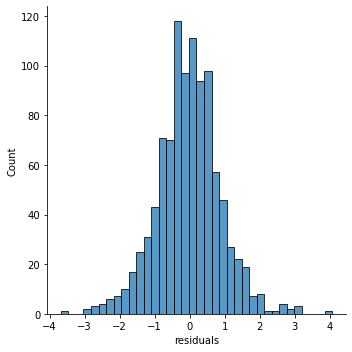

In [31]:
sns.displot(test, x="residuals")

Residuals almost follows normal distribution.

In [32]:
#Checking mean of residuals
test.describe()

,actual,fitted,residuals
count,1006.000000,1006.000000,1006.000000
mean,-0.031919,0.008587,-0.040506
std,0.991271,0.423711,0.901806
min,-4.285473,-2.955625,-3.680637
25%,-0.645291,-0.192135,-0.574669
50%,-0.072133,0.013381,-0.025404
75%,0.571098,0.190636,0.505916
max,4.130427,1.520718,4.064232


Residuals have zero mean, which is another requirement that needs to be satisfied.

In [33]:
# Correlation coefficients of the residuals (last column or last row).
test.corr()

,actual,fitted,residuals
actual,1.000000,0.415338,0.904061
fitted,0.415338,1.000000,-0.013305
residuals,0.904061,-0.013305,1.000000


Residuals are strongly correlated with the actual value, it means that there is some pattern left on them.
More complex models (e.g., non linear ones) should be tested to improve this current one.

The plot below shows how residuals are correlated with the actual value.


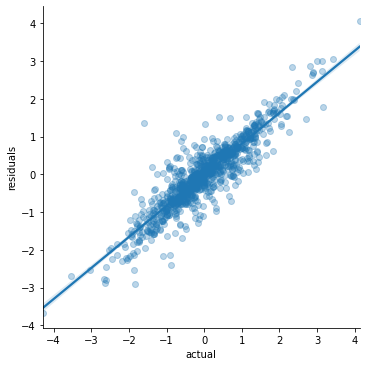

In [34]:
sns.lmplot(data=test, x="actual", y="residuals", scatter_kws={'alpha':0.3})

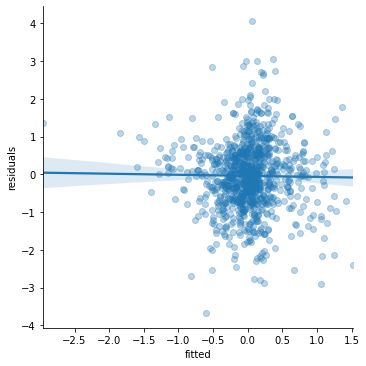

In [35]:
sns.lmplot(data=test, x="fitted", y="residuals", scatter_kws={'alpha':0.3})

The plot above shows how our residuals relate with the fitted values.
We can observe that residuals of this current model are random.

Residuals do not follow any pattern and hence our model is a good model. 


Now we can make predictions using the model

In [38]:
y_pred = lm.predict(X_test)

Text(0, 0.5, 'predicted y')

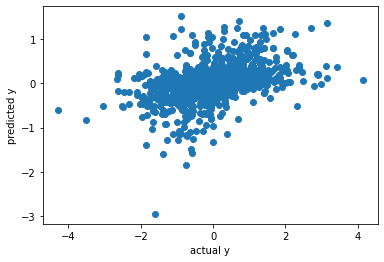

In [50]:
plt.plot(y_test, y_pred, 'o')
plt.xlabel("actual y")
plt.ylabel("predicted y")

y_pred is the predicted value. And now lets check the accuracy of the model using different metrices.

In [45]:
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE: 0.8140872587838676
RMSE: 0.9022678420424102


 Hence this model can be used to make future predictions for the target "TARGET_deathRate".